## Задание 2: информационное исследование процессов

### Борискова, вариант 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a, b, c, d = 1, 0.1, -2, 0.2
m = [_, 1, 1, 0.5, 1, 1, 0.5]
ω = [_, np.pi/12, 5*np.pi/8, np.pi/3, -np.pi/12, np.pi/8, np.pi/3]
θ = [_, 1, 5, 3, 1, 2, 0]

### #1

In [3]:
def X(t):
    return a + b*t + m[1]*np.sin(ω[1]*t + θ[1])\
            + m[2]*np.sin(ω[2]*t + θ[2])\
            + m[3]*np.sin(ω[3]*t + θ[3])
def Y(t):
    return c + d*t + m[4]*np.sin(ω[4]*t + θ[4])\
            + m[5]*np.sin(ω[5]*t + θ[5])\
            + m[6]*np.sin(ω[6]*t + θ[6])

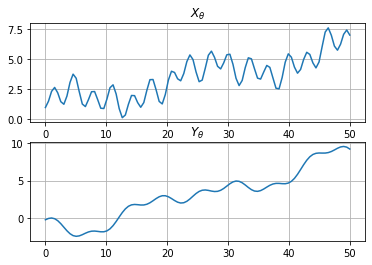

In [4]:
x = np.linspace(0, 50, 100)
y = np.linspace(0, 50, 100)

X_theta = [X(x_i) for x_i in x]
Y_theta = [Y(y_i) for y_i in y]

ax1 = plt.subplot(211)
ax1.plot(x, X_theta)
ax1.set_title(r"$X_\theta$")
ax1.grid()

ax2 = plt.subplot(212)
ax2.plot(y, Y_theta)
ax2.set_title(r"$Y_\theta$")
ax2.grid()

plt.show()

### #2

In [5]:
T = [t for t in range(50)]
X_j = [X(j) for j in T]
Y_j = [Y(j) for j in T]

### #3

In [6]:
β, α = np.polyfit(T, X_j, 1)
ẟ, γ = np.polyfit(T, Y_j, 1)

poly_x = [t*β+α for t in T]
poly_y = [ẟ*t+γ for t in T]

X_o = [x - p_x for x, p_x in zip(X_j, poly_x)]
Y_o = [y - p_y for y, p_y in zip(Y_j, poly_y)]

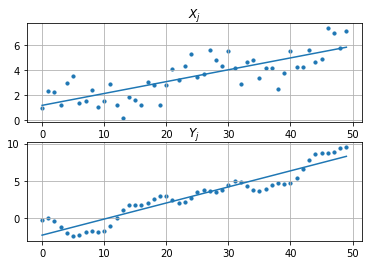

In [7]:
ax1 = plt.subplot(211)
ax1.scatter(T, X_j, s=10)
ax1.plot(T, poly_x)
ax1.set_title(r"$X_j$")
ax1.grid()

ax2 = plt.subplot(212)
ax2.scatter(T, Y_j, s=10)
ax2.plot(T, poly_y)
ax2.set_title(r"$Y_j$")
ax2.grid()

### #4

In [8]:
σ_x = (np.sum([x**2 for x in X_o])/50)**(1/2)
σ_y = (np.sum([y**2 for y in Y_o])/50)**(1/2)

cov = np.sum([x*y for x, y in zip(X_o, Y_o)])/50

print("σ_x = {:.4}\nσ_y = {:.4}".format(σ_x, σ_y), \
    "\n\nσ_x^2 = {:.4}\nσ_y^2 = {:.4}".format(σ_x**2, σ_y**2), \
    "\n\ncovariation = {:.4}".format(cov))

σ_x = 1.05
σ_y = 1.07 

σ_x^2 = 1.102
σ_y^2 = 1.144 

covariation = 0.1377


### #5

In [9]:
a_j = [(-2)*(x <= -1.5*σ_x) + (-1)*(x > -1.5*σ_x)*(x <= -0.5*σ_x) + \
      (1)*(x >= 0.5*σ_x)*(x < 1.5*σ_x) + (2)*(x > 1.5*σ_x) \
       for x in X_o]
b_j = [(-2)*(y <= -1.5*σ_y) + (-1)*(y > -1.5*σ_y)*(y <= -0.5*σ_y) + \
      (1)*(y >= 0.5*σ_y)*(y < 1.5*σ_y) + (2)*(y > 1.5*σ_y) \
       for y in Y_o]

### #6

In [10]:
P = np.zeros((5, 5))
for i in range(len(a_j)):
    P[a_j[i]+2, b_j[i]+2] += 1/len(a_j)
print(P)

[[0.   0.02 0.   0.04 0.  ]
 [0.04 0.08 0.06 0.1  0.  ]
 [0.02 0.1  0.14 0.1  0.02]
 [0.   0.04 0.08 0.06 0.02]
 [0.   0.02 0.04 0.02 0.  ]]


### #7

In [12]:
from collections import Counter
def p(X):
    count = Counter(X)
    keys = list(count.keys())
    keys.sort()
    return [count[i]/len(X) for i in keys]

def smartlog2(p1, p2):
    if p1*p2 == 0:
        return 0
    return np.log2(p1/p2)

def H(X):
    return np.sum([-x*smartlog2(x, 1) for x in X])

Pa = p(a_j)
Pb = p(b_j)

def Dkl(p1, p2):
    return np.sum([p1[i]*smartlog2(p1[i], p2[i]) for i in range(len(p1))])

print("H(a) = {:.4}".format(H(Pa)),
      "\nH(b) = {:.4}".format(H(Pb)),
      "\nH(ab) = {:.4}".format(H(P.flatten())),
      "\nH(a) + H(b) - H(ab) = {:.4}".format(H(Pa)+H(Pb)-H(P.flatten())),
      "\n\nH(b|a) = {:.4}".format(H(P.flatten()) - H(Pa)),
      "\nH(a|b) = {:.4}".format(H(P.flatten()) - H(Pb)),
      "\n\nDkl(a|b) = {:.4}".format(Dkl(Pa, Pb)),
      "\nDkl(b|a) = {:.4}".format(Dkl(Pb, Pa)))

H(a) = 2.044 
H(b) = 1.987 
H(ab) = 3.884 
H(a) + H(b) - H(ab) = 0.1467 

H(b|a) = 1.84 
H(a|b) = 1.897 

Dkl(a|b) = 0.06853 
Dkl(b|a) = 0.06985


### #8

In [13]:
phi = np.array([[0, 0, 1/5, 0, 0],[0, 0, 0, 0, 1/5],[0, 1/5, 0, 0, 0],[1/5, 0, 0, 0, 0],[0, 0, 0, 1/5, 0]])
print('Dkl(P|phi) = {:.4}'.format(np.abs(Dkl(P.flatten(), phi.flatten()))))

Dkl(P|phi) = 0.1664


### #9

In [14]:
R_a = np.zeros(99)
R_b = np.zeros(99)

for k in range(-49, 50):
    if k >= 0:
        for j in range(0, 50-k):
            R_a[k] += 1/50*a_j[j]*a_j[j+k]
    else:
        for j in range(-k, 50):
            R_a[k] += 1/50*a_j[-j]*a_j[-j-k]
            
for k in range(-49, 50):
    if k >= 0:
        for j in range(0, 50-k):
            R_b[k] += 1/50*b_j[j]*b_j[j+k]
    else:
        for j in range(-k, 50):
            R_b[k] += 1/50*b_j[-j]*b_j[-j-k]

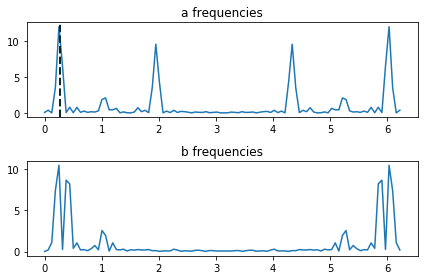

In [17]:
X_a = np.zeros(100) * 0j
X_b = np.zeros(100) * 0j

for k in range(-50, 50):
    for n in range(len(R_a)):
        X_a[k] += R_a[n]*np.exp(-1j*2*np.pi*k*n/len(R_a))
    X_a[k] = float((X_a[k].real**2 + X_a[k].imag**2)**(1/2))
        
        
for k in range(-50, 50):
    for n in range(len(R_b)):
        X_b[k] += R_b[n]*np.exp(-1j*2*np.pi*k*n/len(R_b))
    X_b[k] = float((X_b[k].real**2 + X_b[k].imag**2)**(1/2))
    
Ω = [2*np.pi*k/100 for k in range(100)]

plt.subplot(2, 1, 1)
plt.plot(Ω, X_a)

plt.axvline(x = ω[1], c='#0b2822', linewidth=2, linestyle='--')


plt.title('a frequencies')

plt.subplot(2, 1, 2)
plt.plot(Ω, X_b)

plt.title('b frequencies')

plt.tight_layout()
plt.show()

### #10

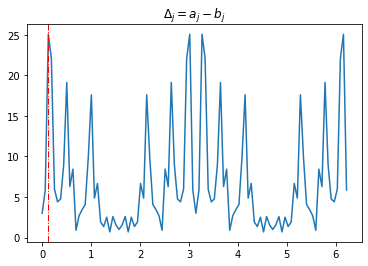

In [19]:
Δ = [a-b for (a, b) in zip(a_j, b_j)]
X_Δ = np.zeros(100) * 0j

for k in range(-50, 50):
    for n in range(len(Δ)):
        X_Δ[k] += Δ[n]*np.exp(-1j*2*np.pi*k*n/len(Δ))
    X_Δ[k] = float((X_Δ[k].real**2 + X_Δ[k].imag**2)**(1/2))

plt.plot(Ω, X_Δ)
k = np.where(X_Δ == sorted(X_Δ)[-1])[0][0]
plt.axvline(x = Ω[k], c='r', linewidth=1, linestyle='-.')
#plt.text(0.3, 0.3,r'$ω_1 = {:.4} \approx ω2 + ω4$'.format(Ω[k]))

plt.title(r'$Δ_j = a_j - b_j$')
plt.show()